<a href="https://colab.research.google.com/github/joaogablira/Aulas_PA/blob/main/Vendas_globais_de_uma_loja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Definição do Problema:**

Qual a questão a ser resolvida? O que esperamos descobrir com a análise?


1-Quais são as vendas totais por região?
2-Quais são as categorias de produtos mais e menos lucrativas?
3-Quais clientes realizaram as maiores compras?
4-Quais estados e cidades possuem os maiores volumes de vendas?

# **2 - Coleta de Dados:**
**Fonte de Dados:** O dataset contém informações sobre.

In [30]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CARREGAR OS DADOS
df = pd.read_csv("https://raw.githubusercontent.com/joaogablira/Aulas_PA/refs/heads/main/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **3 - Exploração de Dados:**

Neste passo, inspecionamos a estrutura dos dados, verificamos a presença de valores faltantes e geramos estatísticas descritivas.

In [31]:
# Verificando valores faltantes
print(df.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [32]:
# Exibindo informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [33]:
# Estatísticas descritivas
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# **4 - Limpeza de Dados:**

Limpeza de Dados é o processo de preparar os dados brutos para análise, garantindo que estejam consistentes, corretos e livres de erros. Isso inclui:

- **Tratamento de valores faltantes:** Preenchendo ou removendo valores ausentes.
Remoção de duplicatas: Eliminando dados duplicados que podem distorcer a análise.
- **Correção de inconsistências:** Ajustando formatos incorretos ou padrões de dados que não seguem uma estrutura definida (como datas ou categorias).
- **Transformações necessárias:** Criando novas colunas a partir de dados existentes para facilitar a análise, como extrair hora e dia da semana a partir de uma data.
Esses passos garantem que a análise seja precisa e confiável.

In [34]:
# Verificando valores faltantes
print("Valores faltantes em cada coluna:")
print(df.isnull().sum())

# Exibindo informações gerais dos dados
print("\nInformações gerais dos dados:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Valores faltantes em cada coluna:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Informações gerais dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country   

# **5 - Visualização de Dados:**
Vamos agora criar gráficos para responder às perguntas formuladas na fase de Definição do Problema.

**Pergunta 1:** *Quais são as vendas totais por região?*

<ipython-input-23-fc0232ee4300>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='viridis')


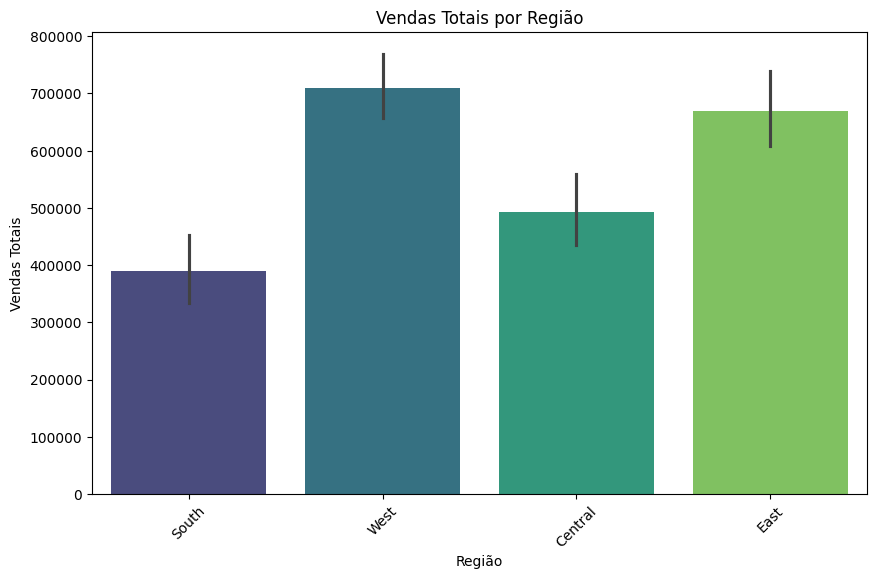

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vendas totais por região
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, palette='viridis')
plt.title('Vendas Totais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

**Pergunta 2:** *Quais são as categorias de produtos mais e menos lucrativas?*

<ipython-input-36-dedba2c6edd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')


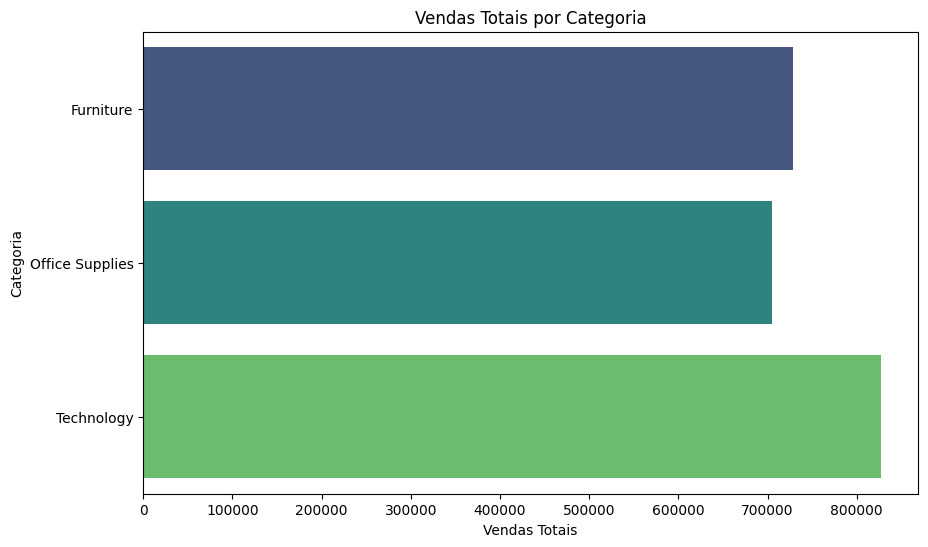

In [36]:
# Total de vendas por categoria
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Visualizando as vendas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')
plt.title('Vendas Totais por Categoria')
plt.xlabel('Vendas Totais')
plt.ylabel('Categoria')
plt.show()


**Pergunta *3*:** *Quais clientes fizeram as maiores compras?*

<ipython-input-37-46d9050192ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Customer Name', data=top_customers, palette='viridis')


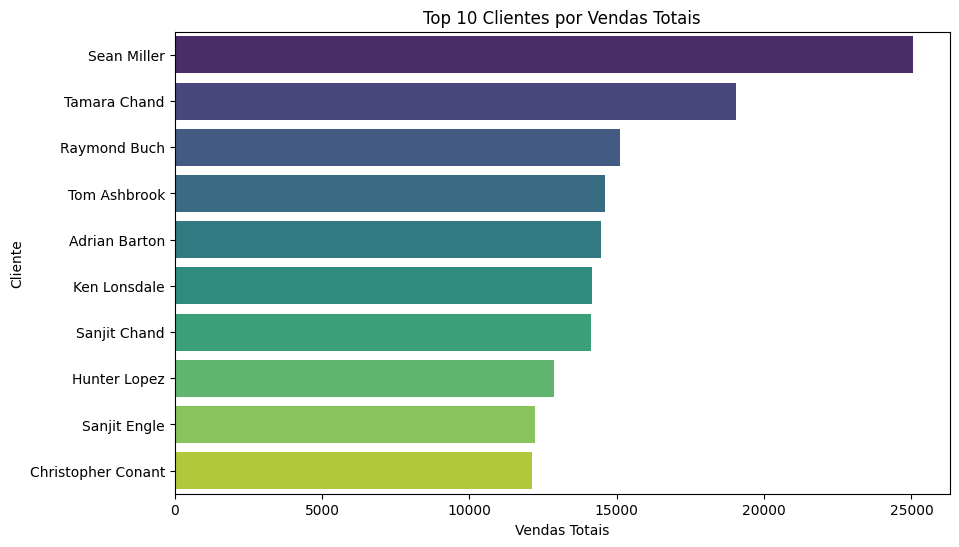

In [37]:
# Total de vendas por cliente
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()

# Visualizando os 10 maiores clientes por vendas totais
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Customer Name', data=top_customers, palette='viridis')
plt.title('Top 10 Clientes por Vendas Totais')
plt.xlabel('Vendas Totais')
plt.ylabel('Cliente')
plt.show()


**Pergunta *4*:** *Quais estados e cidades possuem as maiores vendas?*

<ipython-input-29-a1b1601ff27d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='State', data=state_sales, palette='viridis')


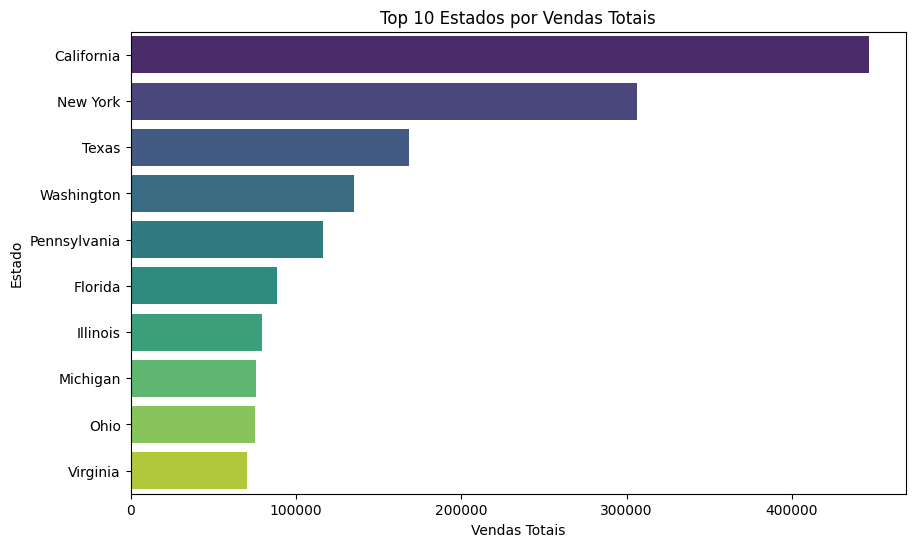

<ipython-input-29-a1b1601ff27d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='City', data=city_sales, palette='viridis')


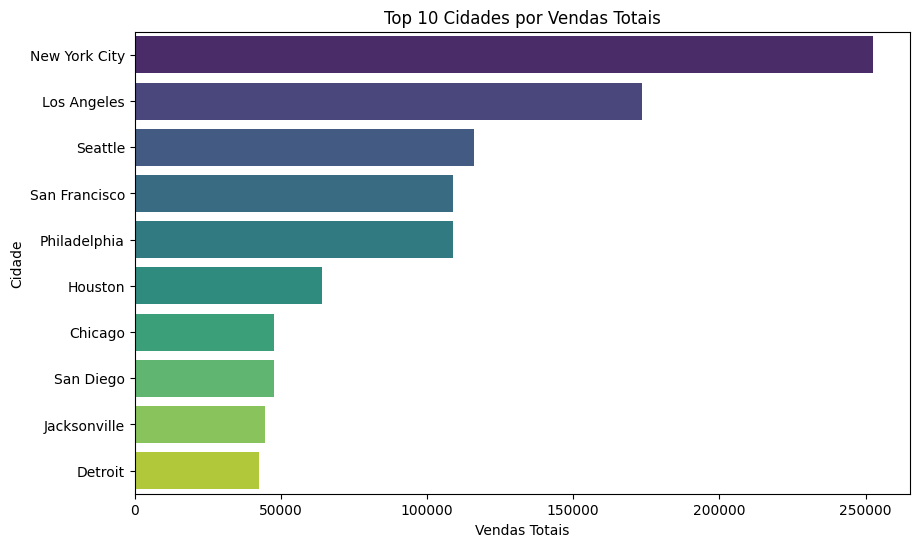

In [29]:
# Total de vendas por estado
state_sales = df.groupby('State')['Sales'].sum().nlargest(10).reset_index()

# Visualizando os 10 estados com maiores vendas
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='State', data=state_sales, palette='viridis')
plt.title('Top 10 Estados por Vendas Totais')
plt.xlabel('Vendas Totais')
plt.ylabel('Estado')
plt.show()

# Total de vendas por cidade
city_sales = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()

# Visualizando as 10 cidades com maiores vendas
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='City', data=city_sales, palette='viridis')
plt.title('Top 10 Cidades por Vendas Totais')
plt.xlabel('Vendas Totais')
plt.ylabel('Cidade')
plt.show()


# **6 - Conclusão e Comunicação:**


**Conclusão 1: Vendas Totais por Região**

A análise mostrou uma diferença considerável nas vendas totais por região. Algumas regiões registram volumes de vendas mais altos do que outras, o que indica que a localização geográfica influencia significativamente o desempenho das vendas. Isso pode ser devido a fatores econômicos, culturais ou de acessibilidade específicos de cada região. Investir em estratégias de marketing e vendas regionalizadas pode ser uma abordagem eficaz para melhorar o desempenho em regiões com vendas mais baixas.

**Conclusão 2: Categorias de Produtos Mais e Menos Lucrativas**

Ao observar o lucro por categoria, constatamos que certas categorias são mais lucrativas que outras. A análise revelou que a categoria "Móveis" tem um desempenho de lucro considerável, enquanto "Tecnologia" também contribui para o lucro total. Produtos de menor lucratividade podem indicar a necessidade de uma reavaliação de estratégias de precificação, descontos ou mesmo uma reformulação da linha de produtos.

**Conclusão 3: Maiores Compradores**

Ao analisar os principais compradores, identificamos que um pequeno grupo de clientes representa uma grande parcela das vendas totais. Esse grupo pode ser essencial para programas de fidelidade ou ações de marketing personalizado, visando manter e aumentar o engajamento desses clientes com a empresa. O alto valor de vendas associado a esses compradores indica que esses clientes possuem alto potencial de receita recorrente.

**Conclusão 4: Vendas por Estado e Cidade**

A análise das vendas por estado e cidade destacou áreas específicas com maiores volumes de vendas. Isso sugere que alguns mercados locais são mais dinâmicos e podem estar mais abertos a novos produtos ou promoções. Esses dados são úteis para orientar decisões estratégicas, como a abertura de novas lojas ou o reforço de campanhas em áreas com maior potencial de crescimento.